In [5]:
import pandas as pd
import numpy as np
import missingno as msno

In [6]:
df = pd.read_csv("sdn_dataset.csv")

In [7]:
df.head(10)

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0
5,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1402,0,0.0,0.0,0
6,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,4,3665,3413,0,0.0,0.0,0
7,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,1,3775,1492,0,0.0,0.0,0
8,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,2,3845,1402,0,0.0,0.0,0
9,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,4,354583059,4295,16578,0.0,16578.0,0


In [8]:
print("This dataset has " + str(df.shape[0]) + " rows and " + str(df.shape[1]) + " columns.")

This dataset has 104345 rows and 23 columns.


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

# Data Preprocessing

Analysis of Missing Data Distribution in the Dataset

<AxesSubplot: >

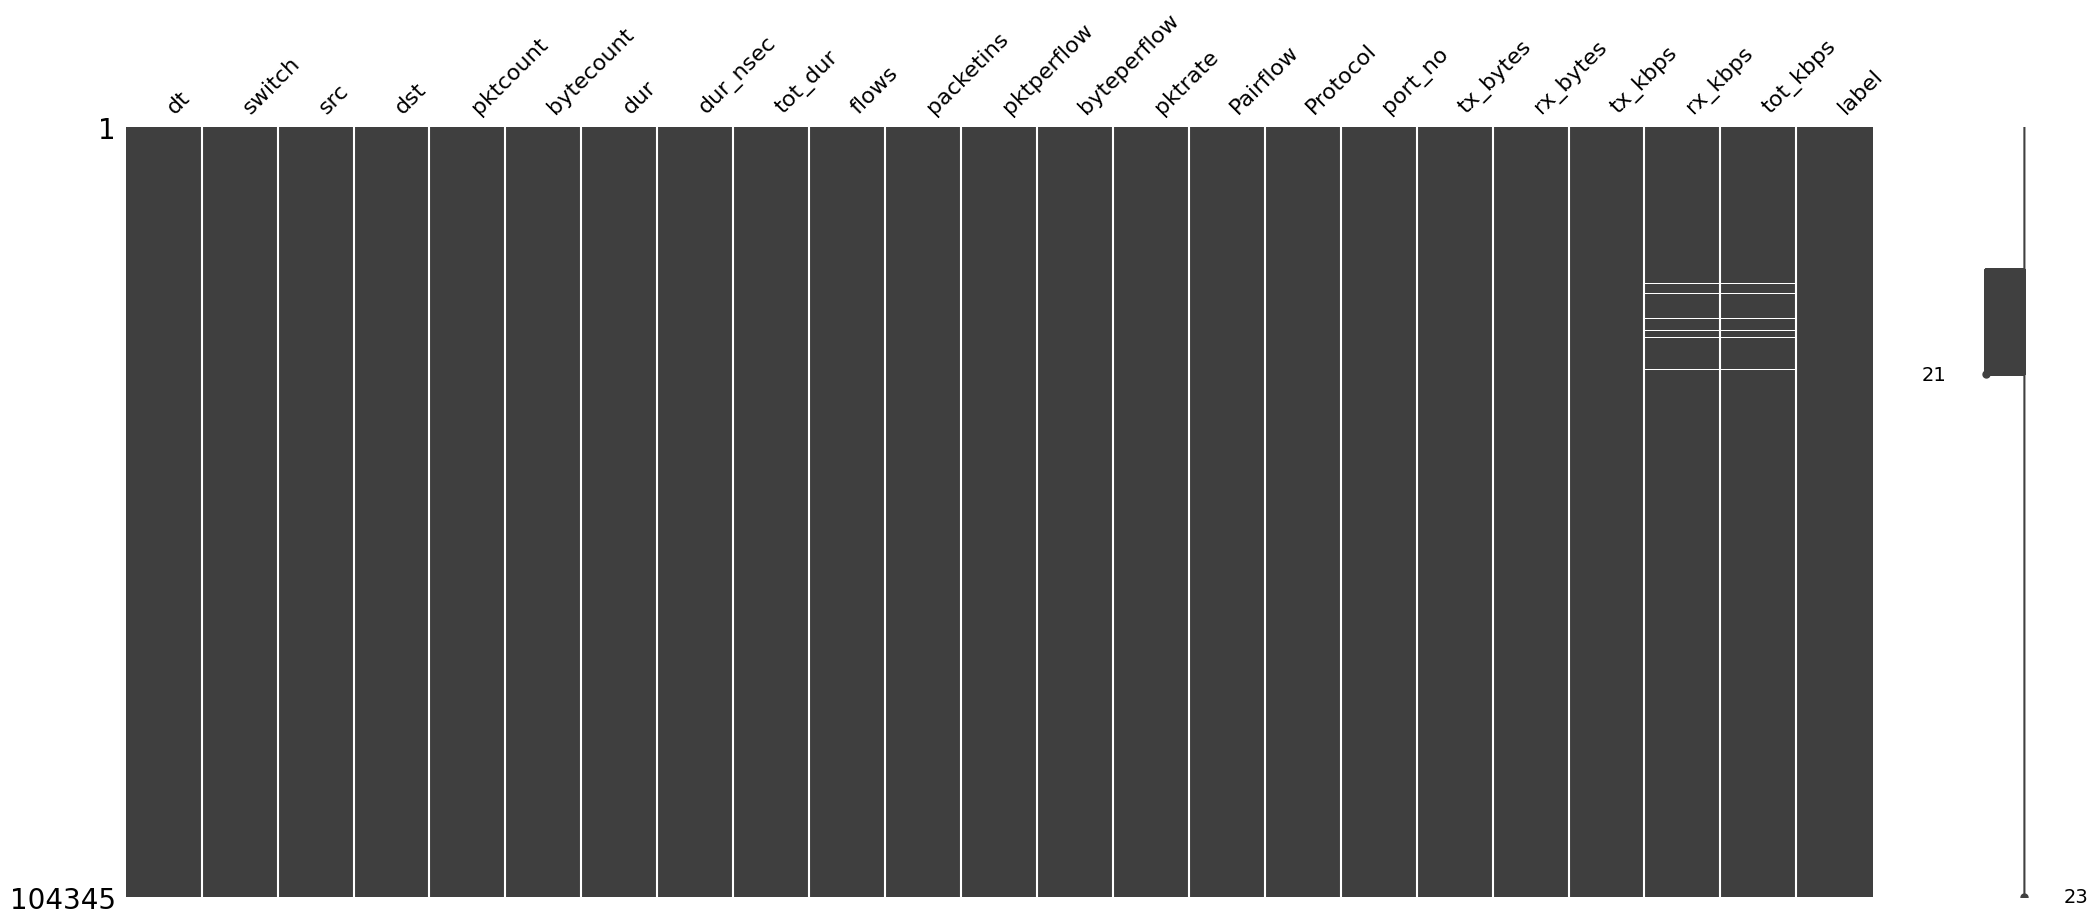

In [10]:
msno.matrix(df)

Frequency of Null Values in the Columns

In [11]:
df.isnull().sum()

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

Drop rows with null values

In [12]:
df.dropna(inplace = True)

In [13]:
df.isnull().sum()

dt             0
switch         0
src            0
dst            0
pktcount       0
bytecount      0
dur            0
dur_nsec       0
tot_dur        0
flows          0
packetins      0
pktperflow     0
byteperflow    0
pktrate        0
Pairflow       0
Protocol       0
port_no        0
tx_bytes       0
rx_bytes       0
tx_kbps        0
rx_kbps        0
tot_kbps       0
label          0
dtype: int64

Dataframe after removing Null Values

In [14]:
print("This dataset has now " + str(df.shape[0]) + " rows and " + str(df.shape[1]) + " columns after dropping Null Values.")

This dataset has now 103839 rows and 23 columns after dropping Null Values.


# Features in the Dataset

1. Categorical Features

In [15]:
categorical_features = [
    feature for feature in df.columns
        if(df[feature].dtypes == 'O')
]

print("Categorical features summary: \n")
print("Total number of Categorical features: ", len(categorical_features))
print("List of Categorical features:")
for i, feature in enumerate(categorical_features, 1):
    print(f"{i}. {feature}")

Categorical features summary: 

Total number of Categorical features:  3
List of Categorical features:
1. src
2. dst
3. Protocol


2. Numerical features

In [16]:
numerical_features = [
    feature for feature in df.columns
        if(df[feature].dtypes != 'O')
]

print("Numerical features summary: \n")
print("Total number of Numerical features: ", len(numerical_features))
print("List of Numerical features:")
for i, feature in enumerate(numerical_features, 1):
    print(f"{i}. {feature}")

Numerical features summary: 

Total number of Numerical features:  20
List of Numerical features:
1. dt
2. switch
3. pktcount
4. bytecount
5. dur
6. dur_nsec
7. tot_dur
8. flows
9. packetins
10. pktperflow
11. byteperflow
12. pktrate
13. Pairflow
14. port_no
15. tx_bytes
16. rx_bytes
17. tx_kbps
18. rx_kbps
19. tot_kbps
20. label


Distinct Values in Numerical Features

In [17]:
df[numerical_features].nunique(axis = 0)

dt               858
switch            10
pktcount        9044
bytecount       9270
dur              840
dur_nsec        1000
tot_dur         4183
flows             15
packetins        168
pktperflow      2092
byteperflow     2793
pktrate          446
Pairflow           2
port_no            5
tx_bytes       12257
rx_bytes       11623
tx_kbps         1800
rx_kbps         1730
tot_kbps        2259
label              2
dtype: int64

2.1 Discrete Numerical Features

In [18]:
discrete_numerical_features = [
    feature for feature in numerical_features
        if(df[feature].nunique() <= 15 and feature != 'label')
]

print("Discrete numerical features summary: \n")
print("Total number of Discrete numerical features: ", len(discrete_numerical_features))
print("List of Discrete numerical features:")
for i, feature in enumerate(discrete_numerical_features, 1):
    print(f"{i}. {feature}")

Discrete numerical features summary: 

Total number of Discrete numerical features:  4
List of Discrete numerical features:
1. switch
2. flows
3. Pairflow
4. port_no


2.2 Continuous Features

In [19]:
continuous_features = [
    feature for feature in numerical_features
        if( feature not in discrete_numerical_features + ['label'])
]

print("Continuous features summary: \n")
print("Total number of Continuous features: ", len(continuous_features))
print("List of Continuous features:")
for i, feature in enumerate(continuous_features, 1):
    print(f"{i}. {feature}")

Continuous features summary: 

Total number of Continuous features:  15
List of Continuous features:
1. dt
2. pktcount
3. bytecount
4. dur
5. dur_nsec
6. tot_dur
7. packetins
8. pktperflow
9. byteperflow
10. pktrate
11. tx_bytes
12. rx_bytes
13. tx_kbps
14. rx_kbps
15. tot_kbps


# Exploratory Data Analysis

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

Plotting Functions

In [26]:
def countPlotDistribution(col):
    sns.set_theme(style = "darkgrid")
    sns.countplot(y = col, data = df, palette = "Set2", hue = col, legend = "auto").set(title = "Distribution of "+ col)

In [27]:
def histoPlotDistribution(col):
    sns.set_theme(style = "darkgrid")
    sns.histplot(data = df, x = col, kde = True, color = "red").set(title = "Distribution of "+ col)

Distribution of Categorical features

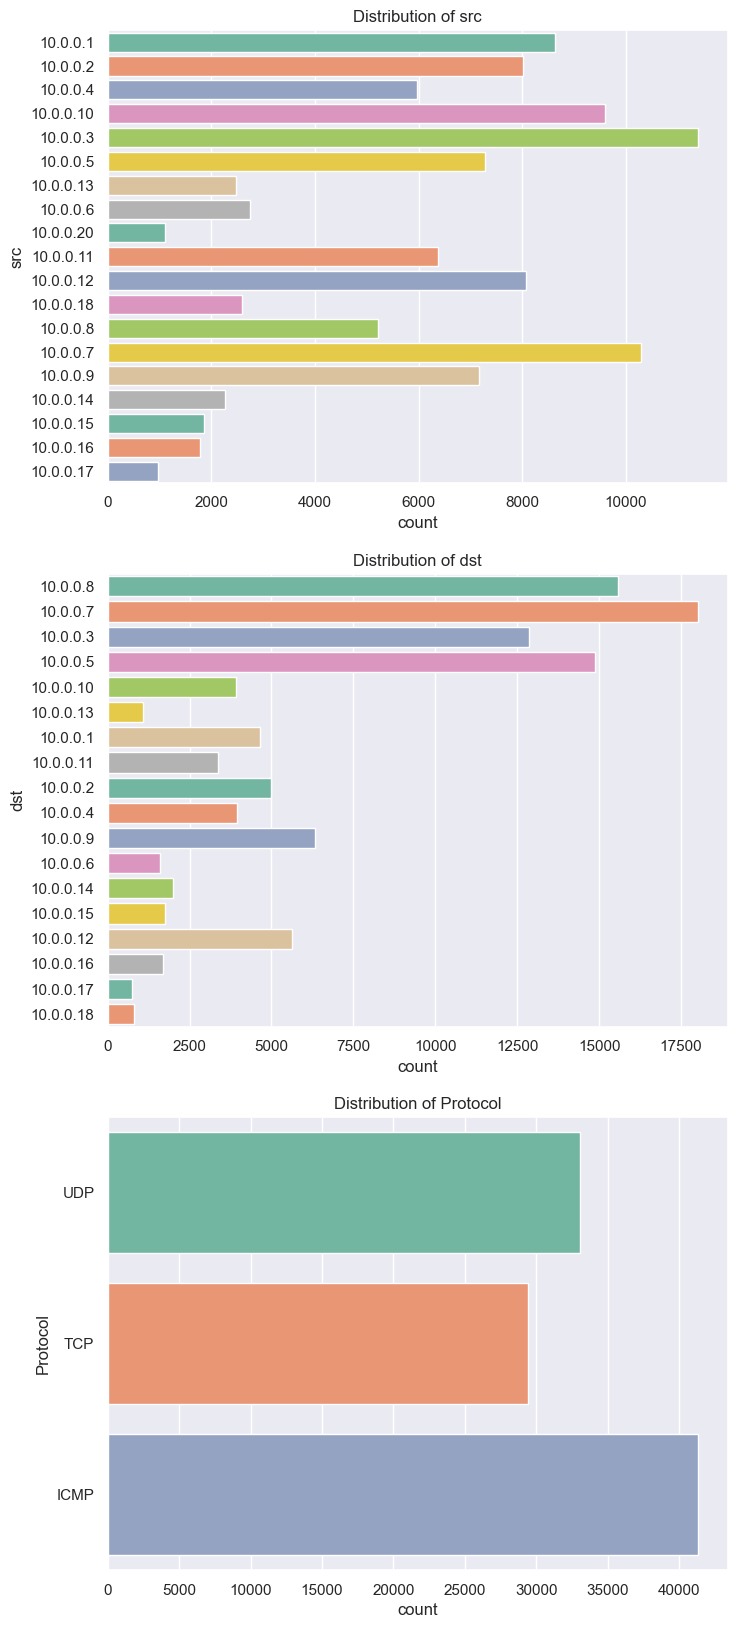

In [28]:
f = plt.figure(figsize = (8, 20))
for i in range(len(categorical_features)):
    f.add_subplot(len(categorical_features), 1, i+1)
    countPlotDistribution(categorical_features[i])
plt.show()

Distribution of Discrete Numerical Features

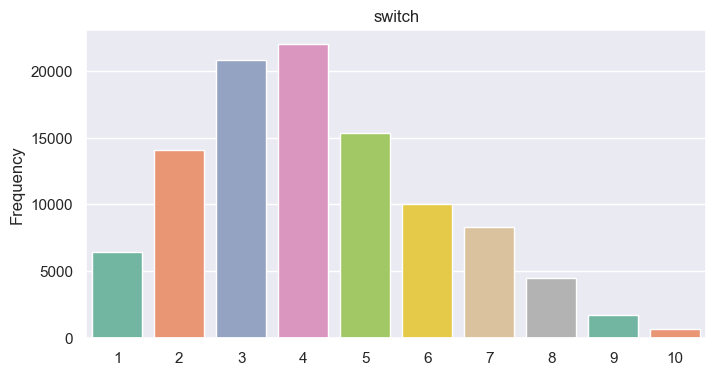

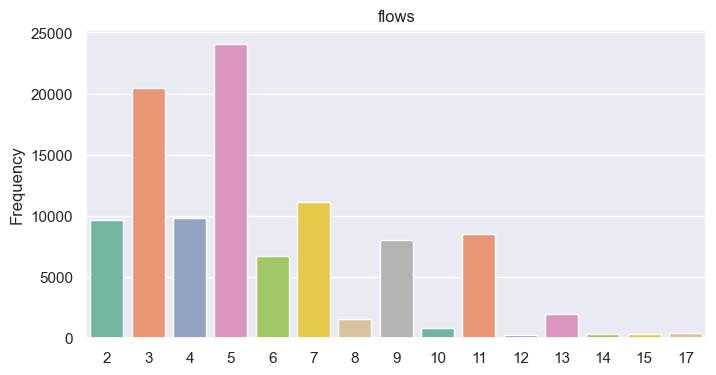

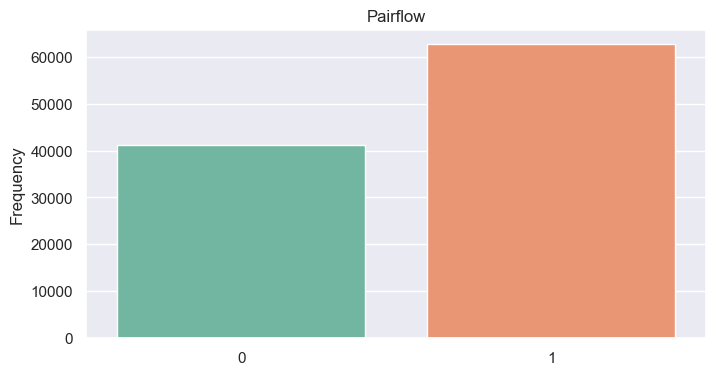

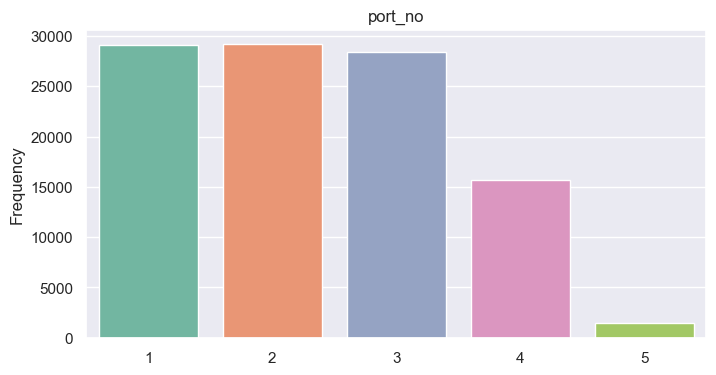

In [29]:
for feature in discrete_numerical_features:
    plt.figure(figsize = (8, 4))
    cat_num = df[feature].value_counts()
    sns.barplot(x = cat_num.index, y = cat_num, palette = "Set2", legend = False, hue = cat_num.index).set(title = feature, ylabel = "Frequency", xlabel = "")
    plt.show()

Distribution of Continuous Features

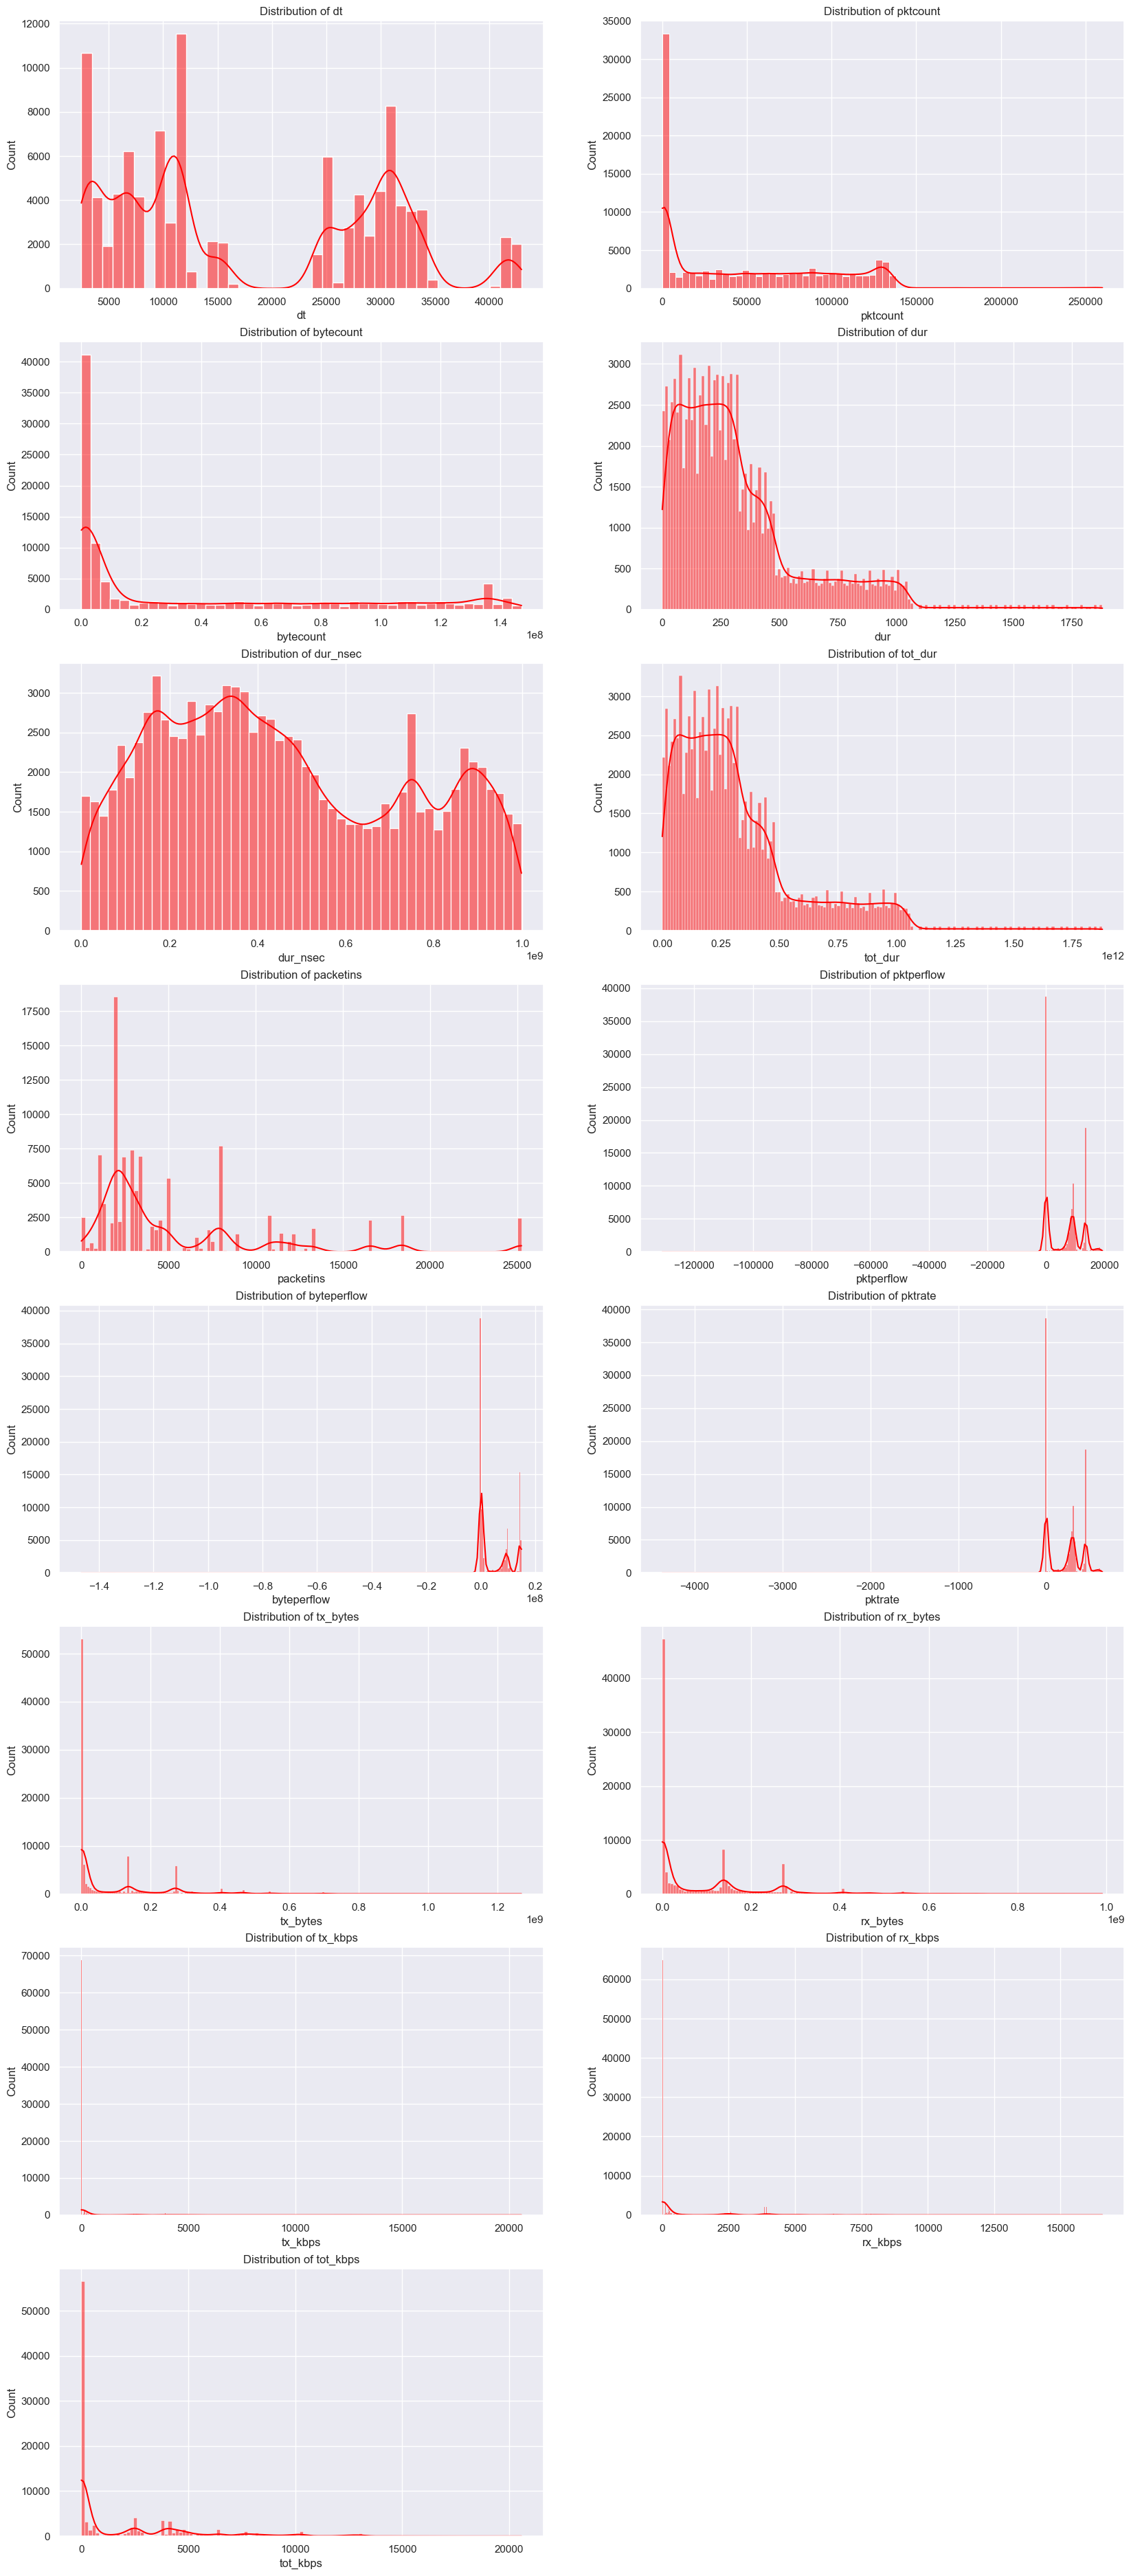

In [30]:
f = plt.figure(figsize = (20, 90))
for i in range(len(continuous_features)):
    f.add_subplot(len(continuous_features), 2, i+1)
    histoPlotDistribution(continuous_features[i])
plt.show()